In [4]:
import cv2

In [5]:
im=cv2.imread("C:/Users/HP/Downloads/bird.jpg")

In [41]:
original_shape=im.shape

In [8]:
import matplotlib.pyplot as plt

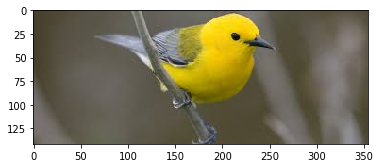

In [13]:

im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [15]:
#faltten each channel
all_pixels=im.reshape((-1,3))
print(all_pixels.shape)

(50410, 3)


In [20]:
from sklearn.cluster import KMeans

In [82]:
dominant_colors=3

km=KMeans(dominant_colors)

km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [83]:
centers=km.cluster_centers_

In [84]:
import numpy as np

In [85]:
centers=np.array(centers,dtype='uint8')

In [86]:
print(centers)

[[123 119 114]
 [ 91  86  68]
 [208 179  19]]


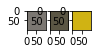

In [87]:
i=1
plt.figure(0,figsize=(4,2))
colors=[]
for each_col in centers:
    plt.subplot(1,10,i)
    i+=1
    
    
    colors.append(each_col)
    
    #color swatch
    
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    
    plt.imshow(a)
    
plt.show()
    
    

In [88]:
colors

[array([123, 119, 114], dtype=uint8),
 array([91, 86, 68], dtype=uint8),
 array([208, 179,  19], dtype=uint8)]

#segment our original image

In [89]:
new_img=np.zeros((142*355,3),dtype='uint8')
print(new_img.shape)

(50410, 3)


In [90]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1])

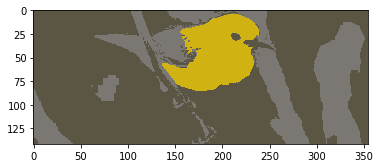

In [91]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
new_img=new_img.reshape((original_shape))
plt.imshow(new_img)

In [92]:
original_shape

(142, 355, 3)